# Feature engineering

In app experience : how they interact with the app which features they click like playlist hamburger button youtube <br>
notification events : notication vidio notfication, features which tries to engage the user <br>
adsEvents : ads click promotional events <br>
engagement events : 
first_open_custom_date_event should be removed from here 
We will take sum of all these and normalize it using min max scaler as to get the score of such things

Engagment, Number of sessions num session can be mixed and than subsetted

share this feature behaving strangely

81616774e29888fe78a3e902f6cecdc9 this id

abnormal user_id : maybe because they can user id for testing purposes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data genereted from pyspark

In [2]:
filename = 'ready_for_eda.csv'
df = pd.read_csv(filename)

# Features
Total unique users in the time period : 6598460 <br>
Features considered : 36

In [4]:
df.shape

(6598460, 43)

In [3]:
df.columns = ['user_pseudo_id', 'widget_events', 'totalEventCount',
       'bottom_mini_playing_bar_event', 'sessNum',
       'notification_events', 'video_notification_event',
       'app_clear_data', 'floating_player_event',
       'interstitial_ad_events', 'lyrics_page_events',
       'ad_close_event', 'app_exception', 'profile_page_events',
       'list_item_clicked_event', 'voice_assistant_event',
       'share', 'playlist_event', 'mini_youtube_event',
       'bottom_option_click_event', 'feature_popup_events',
       'current_search_tab_event', 'appRemove', 'theme_event',
       'edit_tags_page_events', 'screen_view',
       'remove_ads_purchase_event', 'user_engagement',
       'genres_page_event', 'personalization_assignment',
       'wellness_event', 'ringtone_cutter_event',
       'album_art_change_event', 'lyrics_open_event',
       'playing_window_event', 'top_tab_event',
       'inside_page_events', 'youtube_event',
       'ham_burger_click_event', 'font_change_event',
       'engTime_sec', 'equalizer_event',
       'settings_page_events']

In [6]:
df.head(100)

,user_pseudo_id,widget_events,totalEventCount,bottom_mini_playing_bar_event,sessNum,notification_events,video_notification_event,app_clear_data,floating_player_event,interstitial_ad_events,...,lyrics_open_event,playing_window_event,top_tab_event,inside_page_events,youtube_event,ham_burger_click_event,font_change_event,engTime_sec,equalizer_event,settings_page_events
0,c75a7a99f51a8f4e578943bf9bb0b2ed,0,1,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,0,0
1,45f3e2ee9cc17dba89227869f8c6adf5,0,627,232,12.0,560,48,0,0,56,...,0,512,0,0,48,8,0,2695.690,0,0
2,f1a38b974675019f7a1f63ea8a1c075d,0,123,0,5.0,480,0,0,0,0,...,0,256,0,0,0,0,0,159.483,0,0
3,045441ffe13ac1d934659a8c9a536914,0,26,0,3.0,32,0,0,0,0,...,0,0,0,0,0,0,0,80.546,0,0
4,2280b60eb3247cf54063e3d264e10172,0,1,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.061,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,98babc5cb6e82f56d3cb93b9c8dd141a,0,1,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,0,0
96,8b2d8f22ddc5511a72b478f8c0474650,0,180,96,1.0,288,0,0,0,96,...,0,0,0,0,0,0,0,131.160,0,0
97,d5ebb06add96790c445fc28a59868a57,0,46,0,4.0,8,0,0,0,72,...,0,0,0,0,0,0,0,133.460,0,0
98,2b2d783998aa8fae09fda52ad4387cd7,0,160,24,9.0,40,0,0,0,0,...,0,160,0,0,32,0,0,2043.350,0,0


As app remove has majority of uninstalls almost 63 lakh users<br>
Around 28 lakh users uninstalled the app<br>
We are considering appRemove to be binary so greater than one value might be because of multiple clicks on uninstall button<br>
We will be changing all greatre than one value to 1 so that it becomes a binary response<br>

In [7]:
df.appRemove.value_counts()

0     6318398
1      275111
4        1243
6         756
5         701
7         660
8         654
12        636
2         280
3           6
9           3
24          3
15          2
13          2
10          2
14          2
16          1
Name: appRemove, dtype: int64

In [4]:
df.loc[ df.appRemove > 1 , 'appRemove' ] = 1

### appRemove changed to binary response

In [9]:
df.appRemove.value_counts()

0    6318398
1     280062
Name: appRemove, dtype: int64

# Looking For Na Values

In [10]:
df.isnull().sum()

user_pseudo_id                        0
widget_events                         0
totalEventCount                       0
bottom_mini_playing_bar_event         0
sessNum                           68946
notification_events                   0
video_notification_event              0
app_clear_data                        0
floating_player_event                 0
interstitial_ad_events                0
lyrics_page_events                    0
ad_close_event                        0
app_exception                         0
profile_page_events                   0
list_item_clicked_event               0
voice_assistant_event                 0
share                                 0
playlist_event                        0
mini_youtube_event                    0
bottom_option_click_event             0
feature_popup_events                  0
current_search_tab_event              0
appRemove                             0
theme_event                           0
edit_tags_page_events                 0


In [11]:
df.loc[ df.appRemove==1  ,['appRemove',"engTime_sec","sessNum"]]

,appRemove,engTime_sec,sessNum
0,1,NaN,1.0
7,1,NaN,1.0
11,1,NaN,NaN
19,1,NaN,1.0
22,1,NaN,1.0
...,...,...,...
6598390,1,253.377,1.0
6598391,1,90.089,1.0
6598397,1,254.624,1.0
6598433,1,353.494,2.0


# First Remove outliers than calculate this

In [30]:
takeTheMean = df.groupby('appRemove').mean().transpose()

In [31]:
takeTheMean

appRemove,0,1
widget_events,9.648398,0.369061
totalEventCount,357.395974,27.114028
bottom_mini_playing_bar_event,38.591762,2.133985
sessNum,8.380855,1.333212
notification_events,421.981833,17.812427
video_notification_event,0.853985,0.529083
app_clear_data,0.366268,0.081011
floating_player_event,1.616766,0.134142
interstitial_ad_events,110.447731,5.244439
lyrics_page_events,1.214717,0.178303


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
widget_events,6598460.0,9.254550,166.827083,0.0,0.000,0.0000,0.0000,73864.000
totalEventCount,6598460.0,343.377639,761.883164,1.0,33.000,118.0000,356.0000,369546.000
bottom_mini_playing_bar_event,6598460.0,37.044365,121.753148,0.0,0.000,0.0000,32.0000,42048.000
sessNum,6529514.0,8.098873,9.250045,1.0,2.000,5.0000,11.0000,210.000
notification_events,6598460.0,404.827452,1533.871754,0.0,0.000,40.0000,248.0000,265344.000
video_notification_event,6598460.0,0.840195,13.680955,0.0,0.000,0.0000,0.0000,7352.000
app_clear_data,6598460.0,0.354160,18.304754,0.0,0.000,0.0000,0.0000,9912.000
floating_player_event,6598460.0,1.553838,74.647154,0.0,0.000,0.0000,0.0000,77464.000
interstitial_ad_events,6598460.0,105.982530,542.213376,0.0,0.000,0.0000,32.0000,185864.000
lyrics_page_events,6598460.0,1.170728,48.845957,0.0,0.000,0.0000,0.0000,62336.000


# Split  on totalEvents

In [37]:
df_low = df.loc[df.totalEventCount <= 15 , :]
df_high = df.loc[df.totalEventCount >= 15 , :]

# EDA on LOW

In [15]:
df_low.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
widget_events,951017.0,0.210158,2.870674,0.000,0.000,0.000,0.000,120.000
totalEventCount,951017.0,6.313064,4.850345,1.000,1.000,5.000,11.000,15.000
bottom_mini_playing_bar_event,951017.0,0.450087,2.349721,0.000,0.000,0.000,0.000,96.000
sessNum,887644.0,1.190649,0.792316,1.000,1.000,1.000,1.000,15.000
notification_events,951017.0,1.413796,5.993243,0.000,0.000,0.000,0.000,120.000
video_notification_event,951017.0,0.003895,0.191472,0.000,0.000,0.000,0.000,64.000
app_clear_data,951017.0,0.095620,1.238506,0.000,0.000,0.000,0.000,120.000
floating_player_event,951017.0,0.217771,2.088727,0.000,0.000,0.000,0.000,96.000
interstitial_ad_events,951017.0,2.065923,4.988148,0.000,0.000,0.000,0.000,96.000
lyrics_page_events,951017.0,0.000757,0.085249,0.000,0.000,0.000,0.000,24.000


In [6]:
in_app_experience = [
 'app_exception',
 'app_clear_data',
 'album_art_change_event',
 'bottom_mini_playing_bar_event',
 'bottom_option_click_event',
 'current_search_tab_event',
 'edit_tags_page_events',
 'equalizer_event',
 'font_change_event',
 'genres_page_event',
 'ham_burger_click_event',
 'inside_page_events',
 'list_item_clicked_event',
 'playing_window_event',
 'playlist_event',
 'settings_page_events',
 'theme_event',
 'top_tab_event',
 'widget_events',             
]

profile_visits = [
        'personalization_assignment',
        'profile_page_events',
        'wellness_event',
]

special_features = [
      'floating_player_event',
      'lyrics_open_event',
      'lyrics_page_events',
      'mini_youtube_event',
      'ringtone_cutter_event',
      'voice_assistant_event',
      'youtube_event',
      'feature_popup_events',
]

notification_events = [
   'notification_events',
   'video_notification_event',                   
]

adsEvents = [
    'ad_close_event',    
    'remove_ads_purchase_event',
    'interstitial_ad_events', 
]

engagement_events =[
    'engTime_sec',   
    'user_engagement',             
]

to_modify = [
  'totalEventCount',
  'sessNum', 
  'screen_view', 
  'share',         
]

In [38]:
df_low["sum_in_app_exp"] = df_low.loc[:,in_app_experience].sum(axis=1)
df_low["sum_special_features"] = df_low.loc[:,special_features].sum(axis=1)
df_low["sum_adsEvents"] = df_low.loc[:,adsEvents].sum(axis=1)
df_low["sum_engagement_events"] = df_low.loc[:,engagement_events].sum(axis=1)
df_low["sum_notification_events"] = df_low.loc[:,notification_events].sum(axis=1)
df_low["sum_profile_visits"] = df_low.loc[:,profile_visits].sum(axis=1)

df_low.drop(in_app_experience,axis=1,inplace=True)
df_low.drop(special_features,axis=1,inplace=True)
df_low.drop(notification_events,axis=1,inplace=True)
df_low.drop(adsEvents,axis=1,inplace=True)
df_low.drop(engagement_events,axis=1,inplace=True)
df_low.drop("share",axis=1,inplace=True)
df_low.drop(profile_visits,axis=1,inplace=True)

C:\Users\nEEm\AppData\Local\Temp/ipykernel_8660/1135371446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low["sum_in_app_exp"] = df_low.loc[:,in_app_experience].sum(axis=1)
C:\Users\nEEm\AppData\Local\Temp/ipykernel_8660/1135371446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low["sum_special_features"] = df_low.loc[:,special_features].sum(axis=1)
C:\Users\nEEm\AppData\Local\Temp/ipykernel_8660/1135371446.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [42]:
df_low

,user_pseudo_id,sessNum,appRemove,screen_view,sum_in_app_exp,sum_special_features,sum_adsEvents,sum_engagement_events,sum_notification_events,sum_profile_visits
0,c75a7a99f51a8f4e578943bf9bb0b2ed,1.0,1,0,0,0,0,0.000,0,0
4,2280b60eb3247cf54063e3d264e10172,1.0,0,0,0,0,0,15.061,0,0
7,563bef316a43e461553b99c77d002d48,1.0,1,0,0,0,0,0.000,0,0
11,a6d454aab932dc5bb2af3effcc56e8dd,NaN,1,0,0,0,0,0.000,0,0
17,dd66340050823c22eb9a2e3951ae2d1f,NaN,0,0,0,0,0,0.001,0,0
...,...,...,...,...,...,...,...,...,...,...
6598344,95be5fe5838e4e53800752a9c4a202ea,1.0,0,56,16,0,8,22.066,0,16
6598345,80815c5e9a93b8ca12c2c153a1010a71,1.0,0,56,8,0,8,305.460,0,8
6598348,235199c79dfa18a23539a51c0f1d6823,1.0,0,64,0,0,16,12.161,0,24
6598412,f5f1c5b41169265813b2503018540d0c,2.0,0,24,8,0,8,63.487,16,16


In [19]:
df_low.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sessNum,887644.0,1.190649,0.792316,1.0,1.0,1.000,1.000,15.000
appRemove,951017.0,0.233866,0.423288,0.0,0.0,0.000,0.000,1.000
screen_view,951017.0,17.570470,17.400865,0.0,0.0,8.000,32.000,112.000
sum_in_app_exp,951017.0,1.937875,5.662358,0.0,0.0,0.000,0.000,120.000
sum_special_features,951017.0,0.314678,2.358551,0.0,0.0,0.000,0.000,104.000
sum_adsEvents,951017.0,5.103455,7.085337,0.0,0.0,0.000,8.000,96.000
sum_engagement_events,951017.0,32.025842,153.913931,0.0,0.0,10.107,25.071,54463.214
sum_notification_events,951017.0,1.417691,5.996572,0.0,0.0,0.000,0.000,120.000
sum_profile_visits,951017.0,2.910451,6.288697,0.0,0.0,0.000,0.000,96.000


In [20]:
df_low.sum_special_features.value_counts()

0      926108
8       18065
16       3904
24       1509
32        778
40        320
48        188
56         69
64         33
72         21
80         13
88          7
104         1
96          1
Name: sum_special_features, dtype: int64

In [39]:
correlation_mat = df_low.drop(["user_pseudo_id"],axis=1).corr()
correlation_mat.style.background_gradient(cmap='coolwarm')

,totalEventCount,sessNum,appRemove,screen_view,sum_in_app_exp,sum_special_features,sum_adsEvents,sum_engagement_events,sum_notification_events,sum_profile_visits
totalEventCount,1.000000,0.162095,-0.563956,0.898603,0.403640,0.098423,0.663884,0.195790,0.199844,0.515295
sessNum,0.162095,1.000000,-0.124671,-0.002926,0.010645,0.004324,-0.025926,0.027367,0.009314,-0.024046
appRemove,-0.563956,-0.124671,1.000000,-0.535412,-0.183675,-0.072198,-0.384292,-0.112228,-0.127840,-0.246685
screen_view,0.898603,-0.002926,-0.535412,1.000000,0.339563,0.049980,0.601041,0.176404,0.074602,0.470306
sum_in_app_exp,0.403640,0.010645,-0.183675,0.339563,1.000000,-0.020627,0.144499,0.090558,0.164765,0.177150
sum_special_features,0.098423,0.004324,-0.072198,0.049980,-0.020627,1.000000,0.010709,0.099135,-0.016340,-0.048785
sum_adsEvents,0.663884,-0.025926,-0.384292,0.601041,0.144499,0.010709,1.000000,0.092438,0.031242,0.320214
sum_engagement_events,0.195790,0.027367,-0.112228,0.176404,0.090558,0.099135,0.092438,1.000000,0.026856,0.059749
sum_notification_events,0.199844,0.009314,-0.127840,0.074602,0.164765,-0.016340,0.031242,0.026856,1.000000,0.037364
sum_profile_visits,0.515295,-0.024046,-0.246685,0.470306,0.177150,-0.048785,0.320214,0.059749,0.037364,1.000000


In [40]:
df_low.drop("totalEventCount",axis=1,inplace=True)

# As expected totalEventCount has strong correlation needs to be eliminated in modeling

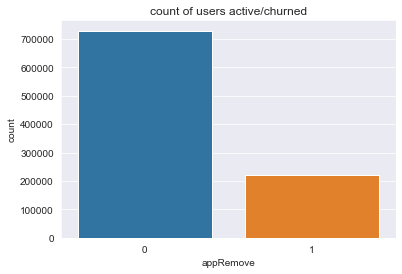

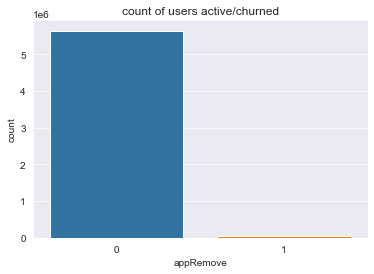

In [51]:
sns.set_style("darkgrid")
sns.countplot(data=df_low,x="appRemove").set_title("count of users active/churned")
plt.show()
sns.countplot(data=df_high,x="appRemove").set_title("count of users active/churned")
plt.show()


In [11]:
df_low.appRemove.value_counts()/df_low.shape[0]

0    0.766134
1    0.233866
Name: appRemove, dtype: float64

In [53]:
df_high.appRemove.value_counts()/df_high.shape[0]

0    0.989785
1    0.010215
Name: appRemove, dtype: float64

# Highly Skewed positive response
In order to deal with highly skewd data we will be doing SMOTE
Than we will scale the features using min max scaler

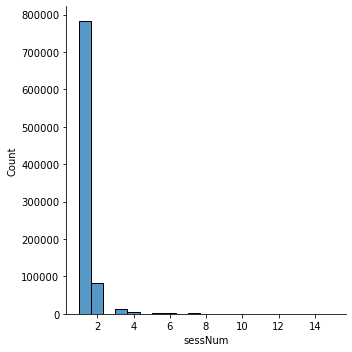

In [24]:
sns.displot(df_low.sessNum)

In [25]:
df_low.isnull().sum()

user_pseudo_id                 0
sessNum                    63373
appRemove                      0
screen_view                    0
sum_in_app_exp                 0
sum_special_features           0
sum_adsEvents                  0
sum_engagement_events          0
sum_notification_events        0
sum_profile_visits             0
dtype: int64

In [44]:
df_low.drop(["sessNum"],axis=1,inplace=True)

C:\Users\nEEm\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Splitting for testing purposes
We will only take those users who have not churned yet <br>
Taking a sample of 1 lakh users who are still active 

In [8]:
df_test = df_low[(df_low.appRemove == 0)].sample(100000,random_state= 0)

Remove those samples from the dataset

In [9]:
df_low = df_low[~df_low.isin(df_test)].dropna()

Now check the split if all things went perfectly

In [10]:
print(df_test.shape)
print(df_low.shape)

(100000, 10)
(793716, 10)


In [54]:
X = df_low.drop('appRemove',axis=1)
y = df_low['appRemove']

In [55]:
X.drop("user_pseudo_id",axis=1,inplace=True)

In [83]:
X.drop("sessNum",axis=1,inplace=True)

### Handling unbalanced classes problem
As we have 76 percent people who are still active and only 23 percent churned <br>
out of all who have total Event count less than 15. 
In this situation its a case of unbalanced class situation and we need to handle it.
<br>
<br>
We will be doing both undersampling and smote to handle balance out the situation so that<br>
the model we fit does not get biased towards negative class

In [56]:
print(len(y))
print(sum(y))

951017
222411


In [13]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# define pipeline
smote = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', smote), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)

Checking the balance of the appRemove now

In [14]:
print(len(y))
print(sum(y))

885123
295041.0


### Final result of of sampling techniques

In [15]:
print(X.shape)
print(y.shape)

(885123, 8)
(885123,)


# Modeling

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##### Scaling of features with min max scaler

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
fit = scaler.fit(X_train)
X_test = fit.transform(X_test)
X_train = fit.transform(X_train)

##### Scaled train

In [18]:
X_train.shape

(593032, 8)

##### Scaled test

In [19]:
X_test.shape

(292091, 8)

##### kfold cross validation for getting the accurate performence of the algorithm on unseen data
We will be using 10 fold cross validation so we will be fitting model 10 times <br>
and than take the average of the results

In [81]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb

clf_xgb=xgb.XGBClassifier(objective='binary:logistic',seed=42)
kfold = KFold(n_splits=5, random_state=7,shuffle=True)
results = cross_val_score(clf_xgb, X_train, y_train, cv=kfold)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 94.42% (0.10%)


#### Indeed the test acuracy came out to be same<br> strong indicator we are not overfitting

In [61]:
import xgboost as xgb
clf_xgb=xgb.XGBClassifier(objective='binary:logistic',seed=42)
model = clf_xgb.fit(X_train,y_train,verbose=False)

In [62]:
model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [63]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,auc


def make_con(y_pred,y_test):
    # actual values
    actual = y_test
     # predicted values
    predicted = y_pred

    # confusion matrix
    matrix = confusion_matrix(actual,predicted, labels=[1,0])
    print('Confusion matrix : \n',matrix)

    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(actual,predicted,).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy
    matrix = classification_report(actual,predicted,labels=[1,0])
    print('Classification report : \n',matrix)
    
def make_curve(probs,y_test):
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    # method I: plt

    plt.title('ROC CURVE')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Confusion matrix : 
 [[ 65030   8417]
 [  4635 235754]]
Outcome values : 
 235754 4635 8417 65030
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.89      0.91     73447
           0       0.97      0.98      0.97    240389

    accuracy                           0.96    313836
   macro avg       0.95      0.93      0.94    313836
weighted avg       0.96      0.96      0.96    313836



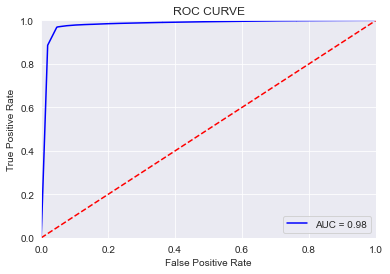

In [64]:
y_pred = clf_xgb.predict(X_test)
make_con(y_pred,y_test)

proba = clf_xgb.predict_proba(X_test)
make_curve(proba,y_test)

# Run More Models

# LogisticRegression

In [88]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression()
kfold = KFold(n_splits=5, random_state=7,shuffle=True)
results = cross_val_score(logreg, X_train, y_train, cv=kfold)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 92.40% (0.06%)


Confusion matrix : 
 [[ 71101   2346]
 [ 21386 219003]]
Outcome values : 
 219003 21386 2346 71101
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.97      0.86     73447
           0       0.99      0.91      0.95    240389

    accuracy                           0.92    313836
   macro avg       0.88      0.94      0.90    313836
weighted avg       0.94      0.92      0.93    313836



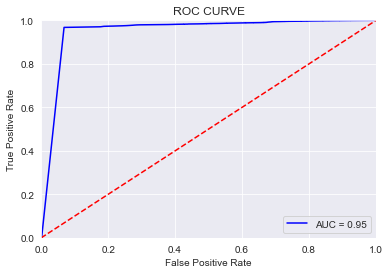

In [89]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0)
model = logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
make_con(y_pred,y_test)

proba = logreg.predict_proba(X_test)
make_curve(proba,y_test)

# KNN CLassifier

Confusion matrix : 
 [[ 94265   3316]
 [  4134 190376]]
Outcome values : 
 190376 4134 3316 94265
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.97      0.96     97581
           0       0.98      0.98      0.98    194510

    accuracy                           0.97    292091
   macro avg       0.97      0.97      0.97    292091
weighted avg       0.97      0.97      0.97    292091



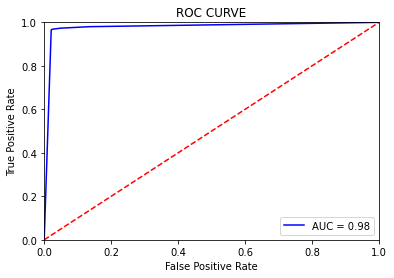

In [28]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=10)
knnModel = clf.fit(X_train, y_train) 

y_pred = knnModel.predict(X_test)
make_con(y_pred,y_test)

proba = knnModel.predict_proba(X_test)
make_curve(proba,y_test)

# Time to interpret the results

In [92]:
import shap
explainer = shap.TreeExplainer(clf_xgb)
shap_values = explainer.shap_values(X_test)

ValueError: This reshape error is often caused by passing a bad data matrix to SHAP. See https://github.com/slundberg/shap/issues/580

In [93]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

NameError: name 'shap_values' is not defined

In [ ]:
shap.dependence_plot("screen_view", shap_values, X_test)

In [ ]:
shap.summary_plot(shap_values, X_test)

# Lets run it on our in real test data which we have preserved

In [97]:
scaled_real_test = scaler.transform( df_test.drop(["user_pseudo_id","appRemove","sessNum"],axis=1) )

## These are the probability of user churing who has not yet churned

In [98]:
proba = logreg.predict_proba(scaled_real_test)
proba[:,1]

array([2.32519340e-08, 6.21945867e-08, 1.20037257e-01, ...,
       1.01596908e-05, 1.20341031e-01, 2.02212321e-03])

(array([7.0804e+04, 1.9394e+04, 9.1000e+02, 6.1000e+01, 2.5000e+01,
        2.9000e+01, 2.2600e+02, 8.4350e+03, 9.2000e+01, 2.4000e+01]),
 array([7.98561722e-18, 9.99997034e-02, 1.99999407e-01, 2.99999110e-01,
        3.99998813e-01, 4.99998517e-01, 5.99998220e-01, 6.99997924e-01,
        7.99997627e-01, 8.99997330e-01, 9.99997034e-01]),
 <BarContainer object of 10 artists>)

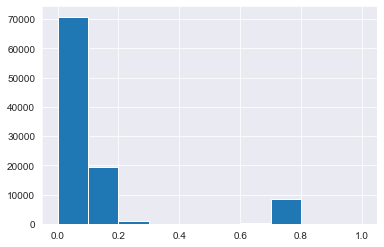

In [99]:
plt.hist(proba[:,1])

WE ARE INTERESTED IN GETTIING THE PROBABILITY OF A USER CHURNING AND RANK BASED ON THEM

In [100]:
Final_Results = pd.DataFrame({ "user_pseudo_id": df_test.user_pseudo_id,"churn_probability" :  proba[:,1]})
Final_Results = Final_Results.reset_index(drop = True)
Final_Results.head()

,user_pseudo_id,churn_probability
0,f8fc091b0644ddf3d87dc3d192296cab,2.325193e-08
1,c3e33cf725ba63c6f6a741c45192d63c,6.219459e-08
2,b099b9d704e1e36257d616a4ae3b5532,1.200373e-01
3,2998a1feae673f3e628903a803648d92,1.197408e-01
4,80c929d452cf218d37880862d3038545,1.203410e-01


# Find the ranks

In [108]:
Final_Results["rank"] = (Final_Results.churn_probability.rank(method='max',ascending=False)).astype('int')
Final_Results['rank'] = (Final_Results["rank"] -( Final_Results.loc[0,"rank"]-1))

In [109]:
Final_Results = Final_Results.sort_values(by="rank")

In [110]:
Final_Results["rank"] = Final_Results["rank"] +87900
Final_Results

,user_pseudo_id,churn_probability,rank
10702,e9677fac3759a37b3d5d5e048f371b29,9.999970e-01,1
72355,860364a9af68b2b8fc9eda76a9a5deda,9.999970e-01,1
31509,73f28b602020fbfd7fc84189187bcd32,9.999970e-01,1
53482,72e10a8d9eb99848fecbc0e65fa625fd,9.999970e-01,1
30083,9b01914b58831410de4aeca92a51bbcd,9.999970e-01,1
...,...,...,...
87570,9f085472bdbc8c47be704289e02a58e6,3.436946e-17,99992
34818,03631c4643a545b4203d1e267f7e4128,3.436946e-17,99992
69905,6889f4a26af8e5447c7c722b3fa686c0,3.436946e-17,99992
70871,a6755da481c94d2391b90da3cce8d1c6,7.985617e-18,99994


# Save the Results

In [111]:
Final_Results.to_csv("new_user_probility_prediction.csv",header=True,index=False)